In [30]:
import pandas as pd

# Cargar los datos de hombres y mujeres
male_df = pd.read_csv('data/male.csv', header=1)
female_df = pd.read_csv('data/female.csv', header=1)

# Lista de términos que no son nombres de países
non_country_terms = [
    'Human Development',
    'Very high human development',
    'High human development',
    'Medium human development',
    'Low human development',
    'Developing Countries',
    'Regions',
    'Arab States',
    'East Asia and the Pacific',
    'Europe and Central Asia',
    'Latin America and the Caribbean',
    'South Asia',
    'Sub-Saharan Africa',
    'Least Developed Countries',
    'Small Island Developing States',
    'Organization for Economic Co-operation and Development',
    'World'
]

# Filtrar las filas que no contienen los términos no deseados
male_df = male_df[~male_df['Country'].isin(non_country_terms)]
female_df = female_df[~female_df['Country'].isin(non_country_terms)]

# Seleccionar los años de interés y la columna de país
years_of_interest = ['1995', '2005', '2015']
columns_to_select = ['Country'] + years_of_interest

# Filtrar las columnas por los años de interés
male_data = male_df[['Country'] + years_of_interest]
female_data = female_df[['Country'] + years_of_interest]

# Renombrar las columnas para diferenciarlas
male_data.columns = ['Country'] + [f"{year}_male" for year in years_of_interest]
female_data.columns = ['Country'] + [f"{year}_female" for year in years_of_interest]

# Unir los datos de hombres y mujeres por país
merged_data = pd.merge(male_data, female_data, on='Country')

# Reemplazar los valores '..' por NaN y luego eliminar las filas con NaN
merged_data.replace('..', pd.NA, inplace=True)
merged_data.dropna(inplace=True)

# Convertir los valores de las columnas seleccionadas a float
for column in [f"{year}_male" for year in years_of_interest] + [f"{year}_female" for year in years_of_interest]:
    merged_data[column] = merged_data[column].astype(float)

# Mostrar las primeras filas del dataframe para verificar
print(merged_data.head())



       Country  1995_male  2005_male  2015_male  1995_female  2005_female  \
0  Afghanistan       82.5       83.1       82.3         43.0         44.0   
1      Albania       73.9       67.9       65.2         53.8         48.1   
2      Algeria       77.7       71.8       67.4         11.8         12.8   
3       Angola       81.0       80.5       80.4         74.8         75.1   
4    Argentina       75.0       75.6       73.4         48.1         49.4   

   2015_female  
0         47.0  
1         47.7  
2         15.2  
3         75.5  
4         47.8  


In [31]:
from sklearn.cluster import KMeans
import numpy as np

# Seleccionar solo las columnas numéricas para el clustering
data_for_clustering = merged_data[[f"{year}_male" for year in years_of_interest] + [f"{year}_female" for year in years_of_interest]]

# Convertir los datos a formato adecuado para clustering (numpy array)
X = np.array(data_for_clustering)

# Inicializar el modelo de clustering
kmeans = KMeans(n_clusters=5, random_state=42)

# Ajustar el modelo
kmeans.fit(X)

# Obtener las etiquetas de clúster
cluster_labels = kmeans.labels_

# Agregar las etiquetas de clúster al dataframe original
merged_data['Cluster'] = cluster_labels

# Mostrar las primeras filas del dataframe con las etiquetas de clúster
print(merged_data.head())


       Country  1995_male  2005_male  2015_male  1995_female  2005_female  \
0  Afghanistan       82.5       83.1       82.3         43.0         44.0   
1      Albania       73.9       67.9       65.2         53.8         48.1   
2      Algeria       77.7       71.8       67.4         11.8         12.8   
3       Angola       81.0       80.5       80.4         74.8         75.1   
4    Argentina       75.0       75.6       73.4         48.1         49.4   

   2015_female  Cluster  
0         47.0        0  
1         47.7        3  
2         15.2        4  
3         75.5        1  
4         47.8        0  


In [32]:
cluster_summary = merged_data['Cluster'].value_counts()
print(cluster_summary)


2    56
3    45
0    33
1    24
4    22
Name: Cluster, dtype: int64


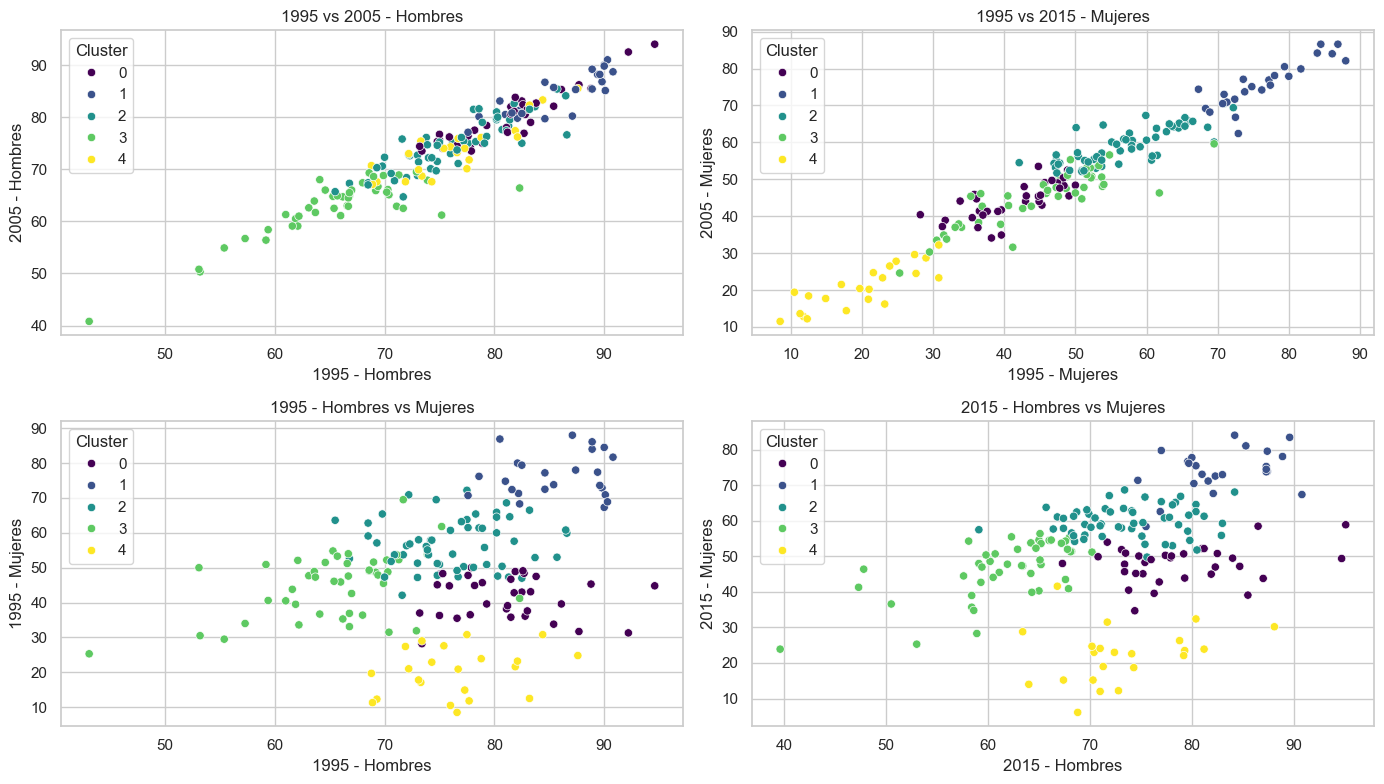

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de dispersión para 1995 vs 2005, hombres y mujeres
plt.figure(figsize=(14, 8))

# 1995 vs 2005 para hombres
plt.subplot(2, 2, 1)
sns.scatterplot(data=merged_data, x='1995_male', y='2005_male', hue='Cluster', palette='viridis')
plt.title('1995 vs 2005 - Hombres')
plt.xlabel('1995 - Hombres')
plt.ylabel('2005 - Hombres')

# 1995 vs 2005 para mujeres
plt.subplot(2, 2, 2)
sns.scatterplot(data=merged_data, x='1995_female', y='2005_female', hue='Cluster', palette='viridis')
plt.title('1995 vs 2015 - Mujeres')
plt.xlabel('1995 - Mujeres')
plt.ylabel('2005 - Mujeres')

# 1995 Hombres vs Mujeres
plt.subplot(2, 2, 3)
sns.scatterplot(data=merged_data, x='1995_male', y='1995_female', hue='Cluster', palette='viridis')
plt.title('1995 - Hombres vs Mujeres')
plt.xlabel('1995 - Hombres')
plt.ylabel('1995 - Mujeres')

# 2015 Hombres vs Mujeres
plt.subplot(2, 2, 4)
sns.scatterplot(data=merged_data, x='2015_male', y='2015_female', hue='Cluster', palette='viridis')
plt.title('2015 - Hombres vs Mujeres')
plt.xlabel('2015 - Hombres')
plt.ylabel('2015 - Mujeres')

plt.tight_layout()
plt.show()


In [34]:
# Agrupar los datos por clúster
clusters = merged_data.groupby('Cluster')['Country'].apply(list)

# Imprimir los países en cada clúster
for cluster, countries in clusters.items():
    print(f"Cluster {cluster}:")
    for country in countries:
        print(f" - {country}")
    print("\n")


Cluster 0:
 - Afghanistan
 - Argentina
 - Bahrain
 - Belize
 - Chile
 - Costa Rica
 - Côte d'Ivoire
 - Djibouti
 - Dominican Republic
 - Ecuador
 - El Salvador
 - Fiji
 - Guatemala
 - Guyana
 - Honduras
 - Indonesia
 - Japan
 - Korea (Republic of)
 - Kuwait
 - Malaysia
 - Maldives
 - Mauritius
 - Mexico
 - Nicaragua
 - Panama
 - Philippines
 - Qatar
 - Sao Tome and Principe
 - Sri Lanka
 - Tonga
 - Trinidad and Tobago
 - United Arab Emirates
 - Venezuela (Bolivarian Republic of)


Cluster 1:
 - Angola
 - Bahamas
 - Burkina Faso
 - Burundi
 - Cambodia
 - Cameroon
 - China
 - Eritrea
 - Ethiopia
 - Iceland
 - Korea (Democratic People's Rep. of)
 - Lao People's Democratic Republic
 - Madagascar
 - Malawi
 - Mozambique
 - Nepal
 - Niger
 - Rwanda
 - South Sudan
 - Tanzania (United Republic of)
 - Togo
 - Viet Nam
 - Zambia
 - Zimbabwe


Cluster 2:
 - Australia
 - Azerbaijan
 - Barbados
 - Belarus
 - Benin
 - Bhutan
 - Bolivia (Plurinational State of)
 - Botswana
 - Brazil
 - Brunei Darussa

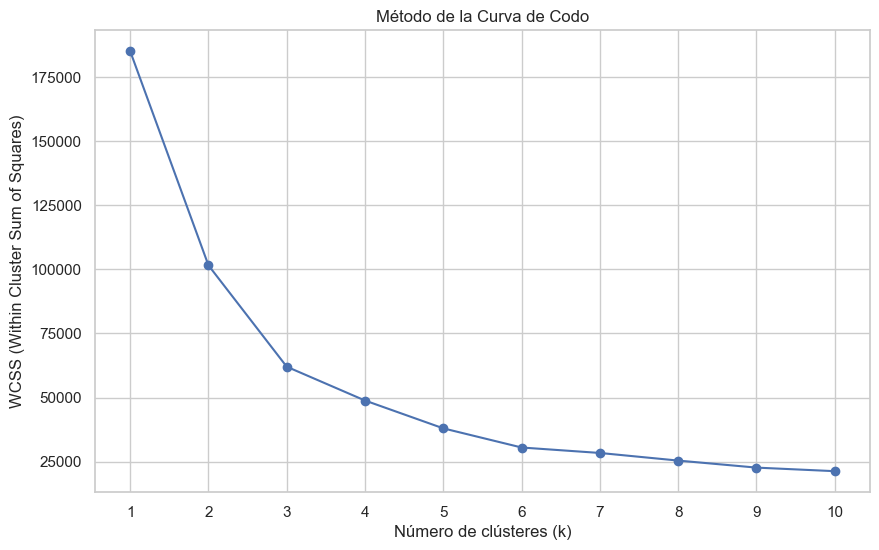

In [35]:

# Inicializar la lista para almacenar los valores de WCSS
wcss = []

# Calcular WCSS para diferentes valores de k
for k in range(1, 11):  # Probamos desde 1 hasta 10 clústeres
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia_ calcula la suma de los cuadrados de las distancias dentro de los clústeres

# Graficar la curva de codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Método de la Curva de Codo')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

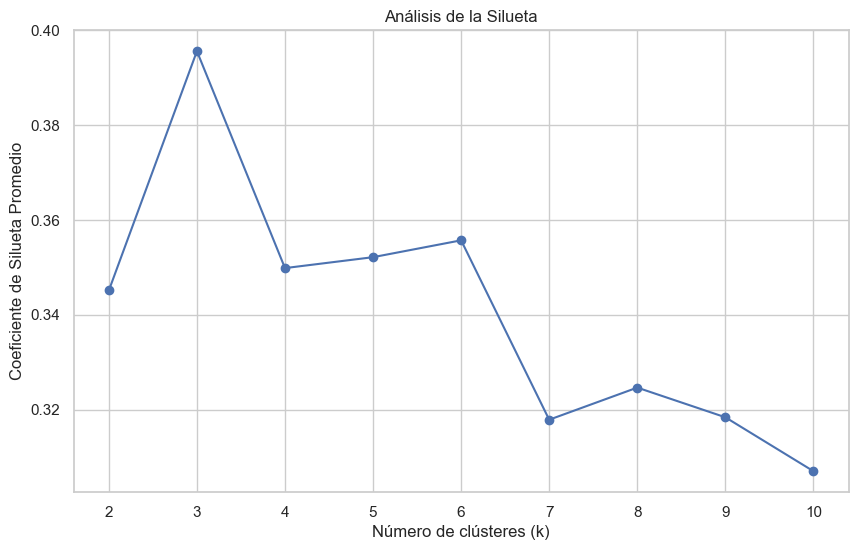

Número óptimo de clústeres según el análisis de silueta: 3
       Country  1995_male  2005_male  2015_male  1995_female  2005_female  \
0  Afghanistan       82.5       83.1       82.3         43.0         44.0   
1      Albania       73.9       67.9       65.2         53.8         48.1   
2      Algeria       77.7       71.8       67.4         11.8         12.8   
3       Angola       81.0       80.5       80.4         74.8         75.1   
4    Argentina       75.0       75.6       73.4         48.1         49.4   

   2015_female  Cluster  
0         47.0        2  
1         47.7        2  
2         15.2        0  
3         75.5        1  
4         47.8        2  
2    102
1     41
0     37
Name: Cluster, dtype: int64


In [36]:
from sklearn.metrics import silhouette_score

# Inicializar la lista para almacenar los valores de silueta
silhouette_scores = []

# Rango de valores de k que deseamos probar
min_clusters = 2
max_clusters = 10

# Calcular el coeficiente de silueta para diferentes valores de k
for k in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la curva de silueta
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Análisis de la Silueta')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Coeficiente de Silueta Promedio')
plt.xticks(range(min_clusters, max_clusters + 1))
plt.grid(True)
plt.show()

# Obtener el valor de k que maximiza el coeficiente de silueta promedio
optimal_k = np.argmax(silhouette_scores) + min_clusters
print(f"Número óptimo de clústeres según el análisis de silueta: {optimal_k}")

# Ajustar el modelo de KMeans con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Agregar las etiquetas de clúster al dataframe original
merged_data['Cluster'] = cluster_labels

# Mostrar las primeras filas del dataframe con las etiquetas de clúster
print(merged_data.head())

# Resumen de los clústeres
cluster_summary = merged_data['Cluster'].value_counts()
print(cluster_summary)

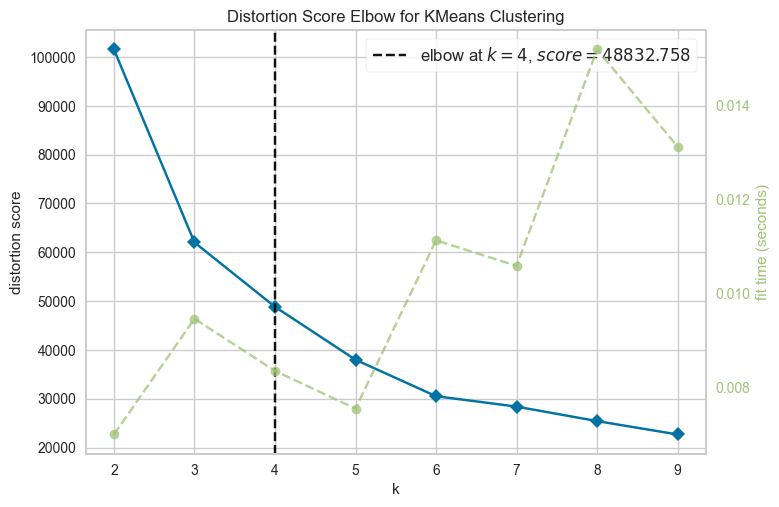

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
from yellowbrick.cluster import KElbowVisualizer

# Instanciar el modelo de KMeans y el visualizador para la curva del codo
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10))

# Ajustar los datos al visualizador
visualizer.fit(X)

# Mostrar la figura
visualizer.show()


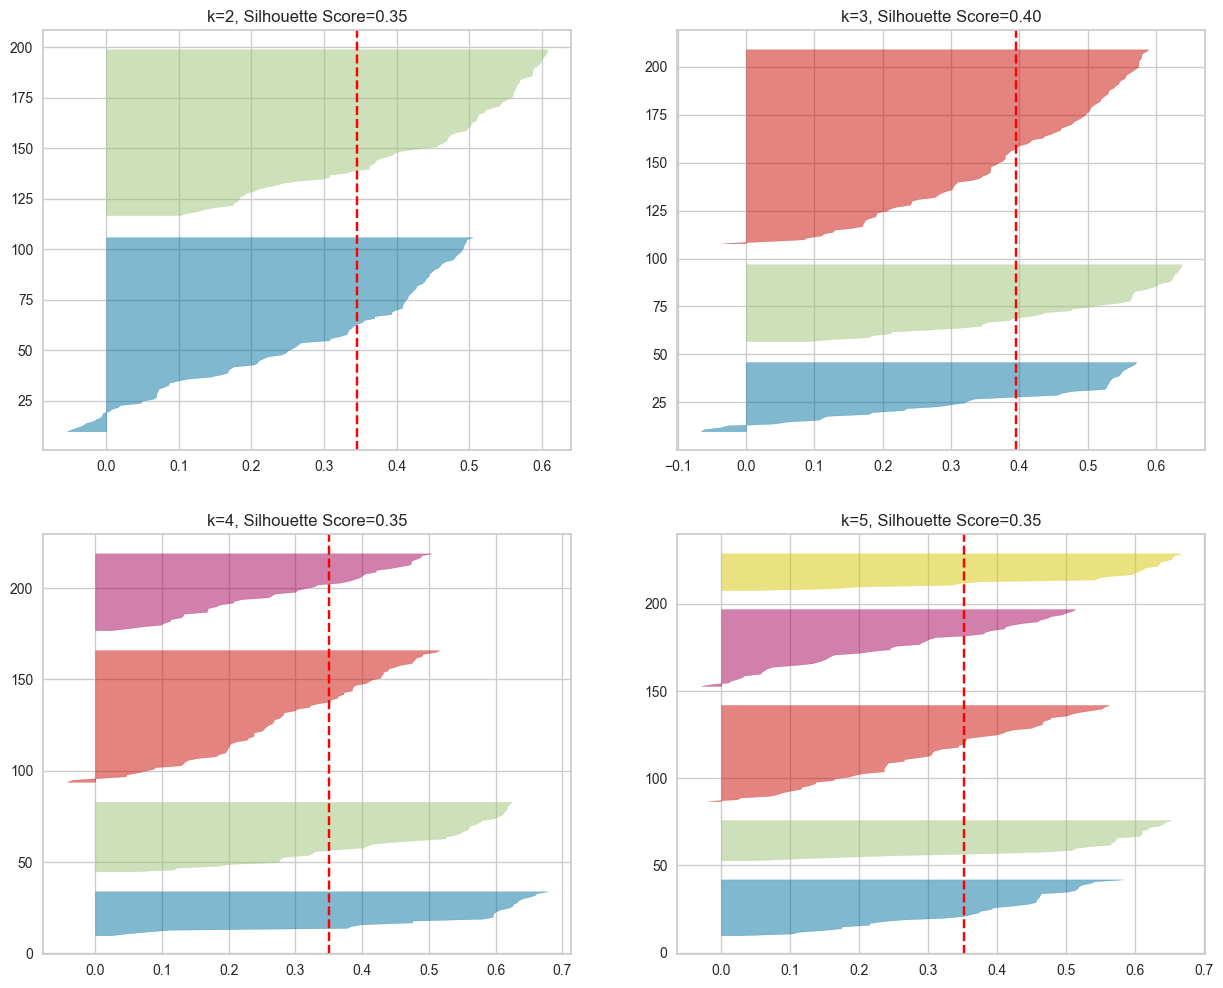

In [45]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Configurar la visualización de silueta con múltiples subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

for i, k in enumerate([2, 3, 4, 5]):
    # Instanciar el modelo de KMeans con un número específico de clústeres
    model = KMeans(n_clusters=k, random_state=42)

    # Configurar el subplot correspondiente para la visualización de silueta
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(X)

    # Agregar el score en la parte superior del gráfico
    silhouette_avg = visualizer.silhouette_score_
    ax[q][mod].set_title(f'k={k}, Silhouette Score={silhouette_avg:.2f}')

plt.show()
